# Property Database for Common Substances

In this chapter, we are primarily concerned with processes that involve the physical transformation of 1 component fluids. We will see that phase transformations play a vital role in the useful functions performed by fluids in these processes. Therefore, we need to be able to easily assemble these properties to facilitate problem solving. In this module, we will see how we can combine the NIST property Database with advanced python data science tools, [selenium](https://www.selenium.dev/downloads/), to assemble these property diagrams.

## Basic Query Example

Below I will walk you through how querrying the property database works and can be automated so that you can download data automatically.

First you will need to download the selenium webdrive and pip install selenium on your python installation

In [1]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import numpy as np
import pandas as pd
from selenium.webdriver.common.by import By


For obtaining property data from different fluids, we need to access the html elements on the [NIST Property Database](https://webbook.nist.gov/chemistry/fluid/). Selenium will allow us to interact directly with the html elements of the webpage including clicking buttons, setting values of drop down menus, and downloading data. Essentially all of the functionality that a user has access to can be automated in selenium.

## Querrying the DataBase

### Step 1: Instantiate the selenium webdriver and define some preliminary properties

In [2]:
webpage = 'https://webbook.nist.gov/chemistry/fluid/'##this is the site homepage that we will always start from
driver = webdriver.Chrome() ##instantiates the webdriver class and opens the webpage
driver.get(webpage)


### Step 2: Manipulate the units and fluid type on the homepage using Selenium

To find the html element names you can right click in google chrome and click on "inspect"

In [3]:
FLUIDS = {'Water':'C7732185',
          'Methane':'C74828',
          'Nitrogen':'C7727379',
          'Oxygen':'C7782447',
          'Methanol':'C67561'}

fluid_box = driver.find_element(By.NAME,'ID') ## identifies the search box associated w/ the NAME label ID

fluid = 'Nitrogen'
#assigns name to the fluid CAS number stored in the FLUIDS dictionary for 
driver.execute_script("arguments[0].value = arguments[1]", fluid_box, FLUIDS[fluid])


You should see that after executing the code above that your open browser window changed from Water (Default) to Nitrogen. Another example is changing the units on the page. 

In [4]:
TUnit = 'C'
TUnit_box = driver.find_element(By.NAME,'TUnit')#.get_attribute('value')
driver.execute_script("arguments[0].value = arguments[1]", TUnit_box, TUnit)

PUnit = 'bar'
PUnit_box = driver.find_element(By.NAME,'PUnit')#.get_attribute('value')
driver.execute_script("arguments[0].value = arguments[1]", PUnit_box, PUnit)


Note that the selector icons will not update with the code above, but the unit value will be changed. Similar commands can be used for all units.

### Step 3: Select property type 

In [6]:
property = 'IsoTherm'#IsoBar,IsoTherm,IsoChor, 'SatP', 'SatT'

propertytype_box = driver.find_element(By.NAME,'Type')
driver.execute_script("arguments[0].value=arguments[1]", propertytype_box,property)

### Step 4: Once happy with your selections click "Press to Continue Button"


In [7]:
action_box = driver.find_element(By.NAME,'Action')
action_box.submit()

You should see a new window

### Step 5: Now we can further modify the field variables to specify the ranges and increments of the values that we seek

We need to at least specify a temperature if we want isothermal data

In [8]:
T = -80
search_box = driver.find_element(By.NAME,'T')
driver.execute_script("arguments[0].value=arguments[1]", search_box,'%.5f'%T)

### Step 6: Get the data

run the action button again "Press for Data"

In [9]:
action_box = driver.find_element(By.NAME,'Action')
action_box.submit()

You should be able to see the data in the new window. We can download it to local drive for further processing using the code below:

### Step 7: Download the data

In [10]:
download_data = driver.find_element(By.LINK_TEXT,"Download data")
download_data.click()

buffer = driver.page_source


In [12]:
data = [] ##grab the data
header = buffer.split('\n')[0].split('>')[-1].split('\t') ##grab the header

for line in buffer.split('\n')[1:]:
    if(len(line.split('\t')) == len(header)):
        data.append(line.split('\t'))

data = np.transpose(data)

output = {}

for i,key in enumerate(header):
    output[key] = data[i]
    
print(output.keys())

dict_keys(['Temperature (C)', 'Pressure (bar)', 'Density (mol/l)', 'Volume (l/mol)', 'Internal Energy (kJ/mol)', 'Enthalpy (kJ/mol)', 'Entropy (J/mol*K)', 'Cv (J/mol*K)', 'Cp (J/mol*K)', 'Sound Spd. (m/s)', 'Joule-Thomson (K/bar)', 'Viscosity (uPa*s)', 'Therm. Cond. (W/m*K)', 'Phase'])


with the data in a dictionary, we can export it as an excel file

### Step 8: Exit the Browser so the driver can be reset

In [13]:
driver.execute_script("window.history.go(-3)")
driver.quit()

## Set up $T-\hat{S}$ Property Diagram using real Property Data

Once we have this automation in place, we can collect the data for $T-\hat{S}$ diagrams by repeating the procedure for hundreds of isotherms and interpolating the same value of entropy. The result is as follows for steam.

['0th Law of Thermodynamics.png', 'Arrow of time.png', 'Carnot Heat Engine.png', 'Carnot Heat Pump.png', 'Carnot Pathways.png', 'Entropy and Equilibrium.png', 'Figure 4.png', 'Figure1.png', 'Figure2.png', 'Heat Engine Reservoir.png', 'Heat Engine.png', 'Heat Pump (colling).png', 'Heat Pump (heating).png', 'Heat Pumps - Image and COP.png', 'Ideal Gas Thermometer.png', 'Liquefaction.png', 'Liquefaction.pptx', 'Macroscopic Balance Expression.png', 'Macroscopic Balance.png', 'methane_P-Hdiagram.png', 'P-V Diagram Steam Isotherms.png', 'Phase Change Coordinate.png', 'Piston_Annotated.png', 'Process Diagram.png', 'Rankine Cycle - Pathway.png', 'Rankine Cycle.png', 'Rankine Refrigeration Cycle.png', 'Reaction Coordinate.png', 'Simple Liquefaction.png', 'TS - Rankine Refrigeration Cycle.png', 'Unit Operation - Boiler.png', 'Unit Operation - Compressor.png', 'Unit Operation - Condenser.png', 'Unit Operation - Heat Exchanger.png', 'Unit Operation - Nozzle.png', 'Unit Operation - Pump.png', 'Unit

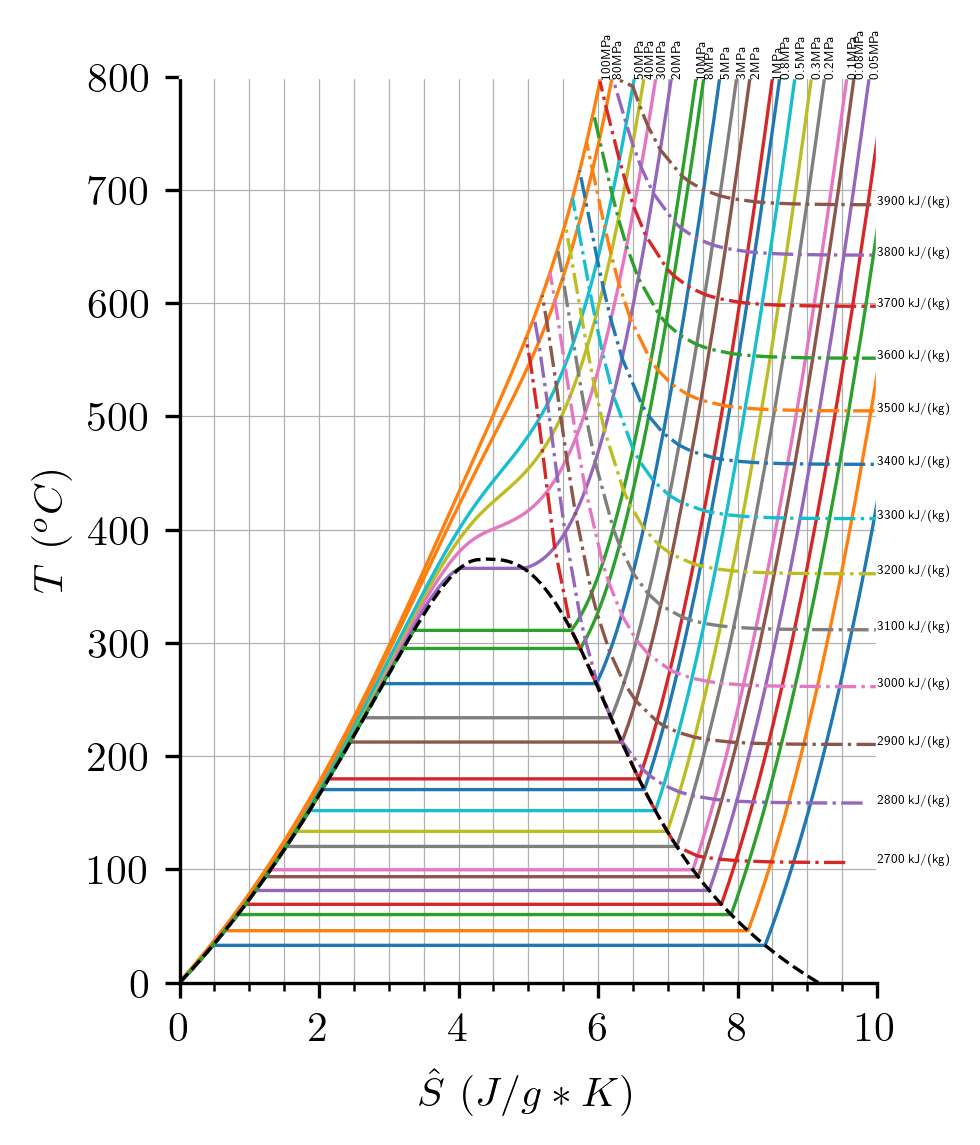

In [28]:
from IPython.display import Image
import os
path = 'C:\\Users\\richa\\OneDrive - Northwestern University\\Northwestern\\Teaching\\Thermodynamics Notes\\Thermodynamics-Notes\\images'
Image(filename = os.path.join(path,'water_T-Sdiagram.png'))

## Set up a $P-\hat{H}$ Property Diagram using real Property Data

Similarly, we can set up Pressure-Enthalpy diagrams for methane or any gas available in the property diagram


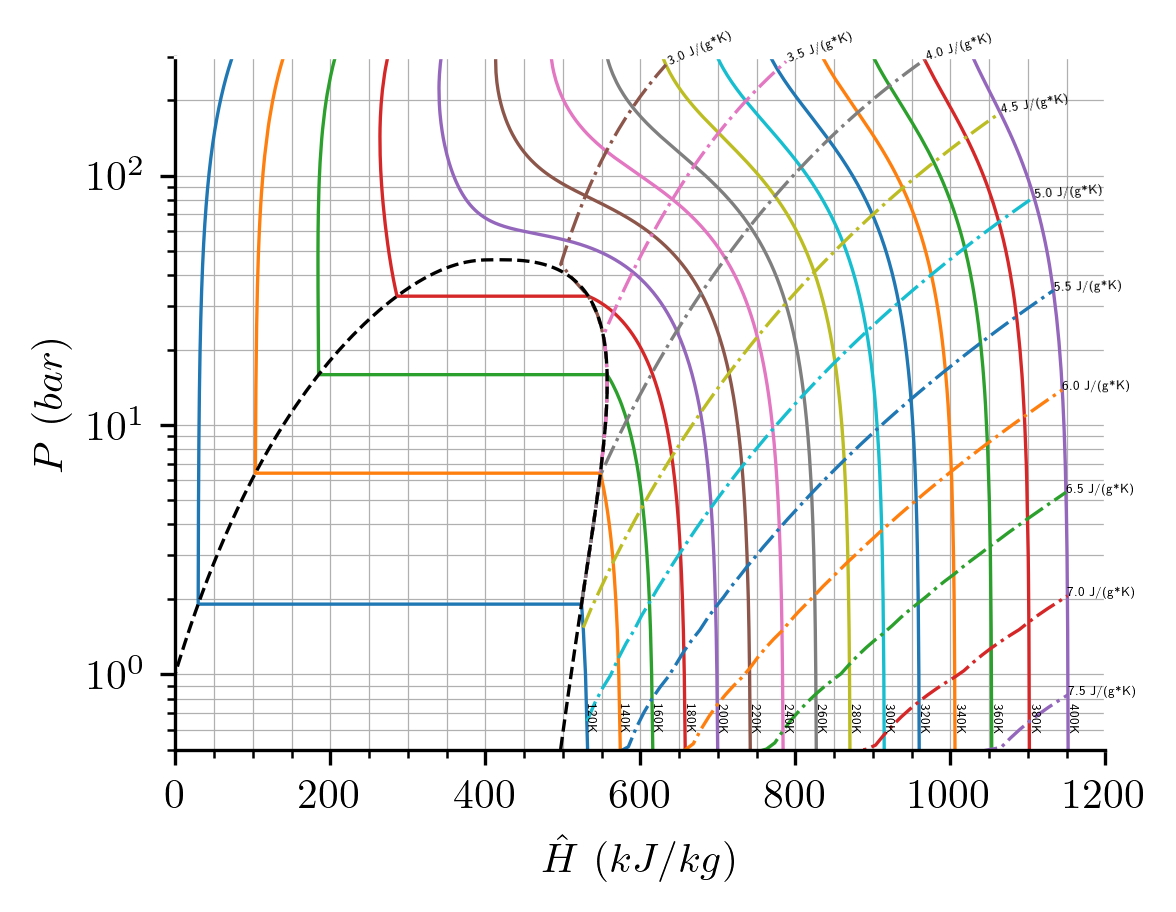

In [30]:
Image(filename = os.path.join(path,'methane_P-Hdiagram.png'))